# Проект "Исследовательский анализ временных рядов цен акций технологических компаний и рыночного индекса"

## Aim and scope

**Aim**

Провести комплексный исследовательский анализ (EDA) исторических данных по ценам закрытия акций выбранных технологических компаний (AAPL, MSFT, GOOGL) и рыночного индекса S&P 500 (^GSPC) за период с 2014 по 2024 год. Цель анализа – выявить и охарактеризовать:

    - Индивидуальные статистические свойства и динамику каждого актива (доходности, волатильность, распределения).

    - Взаимосвязи и корреляции между активами, а также их связь с общерыночной динамикой.

    - Поведение активов в периоды значительных рыночных событий, с особым вниманием к всплеску волатильности в первой половине 2020 года (связанному с COVID-19).

    - Сделать предварительные выводы о профилях риск-доходность рассматриваемых активов и характерных особенностях их поведения на рынке.

**Tasks**

1. Подготовка и предварительный обзор данных
2. Анализ индивидуальных активов:

    2.1. Динамика цен и доходностей:
        Построить графики цен Close, рассчитаны и построить графики дневных процентных доходностей

    2.2. Статистические свойства доходностей:

        Что сделано: Рассчитаны и выведены описательные статистики (mean, std, min, max, quartiles). Рассчитаны асимметрия (skewness) и эксцесс (kurtosis). Построены гистограммы и KDE для распределений доходностей каждого актива.

        Ключевой вопрос для вывода: Насколько распределения доходностей соответствуют нормальному распределению? (Спойлер: скорее всего, нет – будут "тяжелые хвосты", характерные для финансовых данных, что подтверждается эксцессом > 0).

    2.3. Анализ волатильности:

        Что сделано: Построены графики скользящей аннуализированной волатильности (на основе стандартного отклонения доходностей).

        Ключевой вопрос для вывода: Наблюдается ли кластеризация волатильности (периоды высокой волатильности сменяются периодами низкой)? Как вели себя активы во время всплеска 2020 года?

3. Сравнительный анализ и анализ взаимосвязей:

    3.1. Сравнение профилей риск-доходность:

    У нас есть средние доходности и стандартные отклонения (волатильность) для каждого актива из daily_returns.describe().

Что можно добавить:

    Явное сравнение: например, создать небольшую таблицу или точечную диаграмму "средняя доходность vs. волатильность" для всех активов. Это классический способ визуализировать компромисс "риск-доходность".

    Построены boxplot для визуального сравнения распределений доходностей между активами.

    3.2. Корреляционный анализ:

    Что сделано: Рассчитана и визуализирована (тепловая карта) матрица корреляций дневных доходностей.

    Ключевой вопрос для вывода: Насколько сильно коррелируют между собой технологические акции? Как они коррелируют с рыночным индексом?

    3.3. Связь с рынком (Бета-анализ, опционально, но очень хорошо):

    Что сделано: Построены диаграммы рассеяния доходностей каждой акции против доходностей индекса S&P 500.

    Что можно добавить: Рассчитать и интерпретировать коэффициент Бета для каждой акции по отношению к рынку. Бета показывает чувствительность доходности акции к изменению доходности рынка. Это можно сделать с помощью простой линейной регрессии (например, scipy.stats.linregress или statsmodels.api.OLS).

4. Глубокий анализ периода рыночного стресса (COVID-19, 1-е полугодие 2020):

    Что сделано (косвенно): Вы заметили всплеск на графиках волатильности.

    Что можно сделать:

        Визуализация: Отдельно построить графики цен и скользящей волатильности, сфокусировавшись на периоде, скажем, с декабря 2019 по июнь 2020, чтобы лучше рассмотреть динамику.

        Сравнение просадок (Drawdowns): Рассчитать и сравнить максимальные просадки для каждого актива во время этого кризиса.

        Изменение корреляций: Интересно посмотреть, как изменилась матрица корреляций во время кризиса по сравнению с "нормальным" периодом. Корреляции часто возрастают во время паники.

5. Выводы:

    Суммировать основные находки по каждому из пунктов.

    Ответить на вопросы, поставленные в цели проекта. Какие общие черты у технологических акций? Чем они отличаются? Как сильно они зависят от рынка? Как кризисы влияют на них?

    Этот раздел самый важный для демонстрации вашего аналитического мышления.

## Data preparation

In [31]:
# --- Imports ---
import os

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf

In [6]:
# --- Configuration ---
tickers_list = ["AAPL", "MSFT", "GOOGL", "^GSPC"]
start_date = "2014-01-01"
end_date = "2024-12-31"
fin_data_filename = "financial_data.csv"

In [7]:
# --- Download Data ---
# Ignore this block if you already have financial_data.csv with the data
# If not, run this block for donwnloading the data to financial_data.csv
"""
print(f"Downloading data for: {', '.join(tickers_list)}")
print(f"Period: {start_date} to {end_date}")

try:
    all_data = yf.download(tickers_list, start=start_date, end=end_date)

    if not all_data.empty:
        print("\nData downloaded successfully.")

        # Посмотрим на структуру столбцов, чтобы понять, что мы сохраняем
        print("\nStructure of downloaded data columns:")
        print(all_data.columns)

        # --- Save Data to CSV ---
        try:
            all_data.to_csv(fin_data_filename)
            print(f"\nAll downloaded data (including OHLCV) successfully saved to: {fin_data_filename}")
        except Exception as e:
            print(f"\nError saving data to {fin_data_filename}: {e}")
            print("Data was downloaded but not saved.")

    else:
        print("\nDownloaded data (all_data) is empty. Please check tickers and date range. Data not saved.")

except Exception as e:
    print(f"\nAn error occurred during download: {e}")
    print("Data not saved.")
"""
pass

In [19]:
# --- Load Data from CSV ---
if os.path.exists(fin_data_filename):
    print(f"Loading data from {fin_data_filename}...")
    try:
        all_data = pd.read_csv(fin_data_filename, header=[0, 1], index_col=0, parse_dates=True)
        print("Data loaded successfully.")
    except Exception as e:
        print(f"Error loading data from {fin_data_filename}: {e}")
        all_data = pd.DataFrame() # Initialize empty dataframe if loading fails
else:
    print(f"File {fin_data_filename} not found. Please run the download block first.")
    all_data = pd.DataFrame() # Initialize empty dataframe# --- Basic Data Inspection (if data loaded) ---

# --- Brief Data Description ---
if not all_data.empty:
    print("\n--- Data Inspection ---")
    print("\nData head:")
    print(all_data.head())
    print("\nData columns:")
    print(all_data.columns)

    actual_start_date = all_data.index.min().strftime('%Y-%m-%d')
    actual_end_date = all_data.index.max().strftime('%Y-%m-%d')
    num_observations = len(all_data)
    num_tickers_data = len(all_data.columns.levels[1]) # Количество уникальных тикеров во втором уровне мультииндекса столбцов

    print("\n--- Brief Data Description ---")
    print(f"The dataset contains financial data for {num_tickers_data} assets ({', '.join(all_data.columns.levels[1].tolist())}).")
    print(f"Actual data period in the loaded file: {actual_start_date} to {actual_end_date}.")
    print(f"Total number of trading days (observations): {num_observations}.")

    print("\n--- Data Info ---")
    all_data.info()
else:
    print("DataFrame 'all_data' is empty. Halting further analysis.")
    close_data = pd.DataFrame() # Убедимся, что close_data определен как пустой

Loading data from financial_data.csv...
Data loaded successfully.

--- Data Inspection ---

Data head:
Price           Close                                          High  \
Ticker           AAPL      GOOGL       MSFT        ^GSPC       AAPL   
Date                                                                  
2014-01-02  17.192829  27.723312  30.939615  1831.979980  17.314052   
2014-01-03  16.815168  27.521074  30.731455  1831.369995  17.210541   
2014-01-06  16.906870  27.827919  30.082041  1826.770020  16.996077   
2014-01-07  16.785944  28.364391  30.315155  1837.880005  16.969953   
2014-01-08  16.892250  28.423416  29.773956  1837.489990  16.957523   

Price                                                Low             \
Ticker          GOOGL       MSFT        ^GSPC       AAPL      GOOGL   
Date                                                                  
2014-01-02  27.838627  31.139442  1845.859985  17.158328  27.602269   
2014-01-03  27.818201  30.989564  1838.23999

In [21]:
# Пример проверки на пропуски
if not all_data.empty:
    print("\n--- Missing Values Check ---")
    # Проверим пропуски для каждого столбца индивидуально (поскольку у нас мультииндекс)
    missing_values = all_data.isnull().sum()
    # Отфильтруем только те, где есть пропуски, для наглядности
    missing_values_summary = missing_values[missing_values > 0]
    if not missing_values_summary.empty:
        print("Columns with missing values:")
        print(missing_values_summary)
    else:
        print("No missing values found in the dataset.")
else:
    print("DataFrame 'all_data' is empty. Halting further analysis.")


--- Missing Values Check ---
No missing values found in the dataset.


In [23]:
# Выберем только 'Close' для анализа доходностей
if not all_data.empty:
    if 'Close' in all_data.columns.levels[0]:
        close_data = all_data['Close'].copy()
        print("\n'Close' prices data selected for analysis. Head:")
        print(close_data.head())
    else:
        print("\nError: 'Close' data not found in the first level of columns. Please check data structure.")
        close_data = pd.DataFrame() # Создаем пустой DataFrame, чтобы избежать ошибок далее
else:
    print("DataFrame 'all_data' is empty. Halting further analysis.")


'Close' prices data selected for analysis. Head:
Ticker           AAPL      GOOGL       MSFT        ^GSPC
Date                                                    
2014-01-02  17.192829  27.723312  30.939615  1831.979980
2014-01-03  16.815168  27.521074  30.731455  1831.369995
2014-01-06  16.906870  27.827919  30.082041  1826.770020
2014-01-07  16.785944  28.364391  30.315155  1837.880005
2014-01-08  16.892250  28.423416  29.773956  1837.489990


In [24]:
# --- Calculating Daily Returns (продолжение анализа, если close_data не пуст) ---
if not close_data.empty:
    print("\n--- Calculating Daily Returns ---")
    daily_returns = close_data.pct_change()
    daily_returns = daily_returns.dropna()
    print("\nDaily Returns head:")
    print(daily_returns.head())
else:
    # Это сообщение может дублироваться, если all_data было пусто, но так надежнее
    if not all_data.empty: # Только если all_data не был пуст, но close_data стал пустым (например, нет столбца 'Close')
        print("'Close' data is empty or not found, cannot calculate returns.")
    daily_returns = pd.DataFrame() # Убедимся, что daily_returns определен как пустой


--- Calculating Daily Returns ---

Daily Returns head:
Ticker          AAPL     GOOGL      MSFT     ^GSPC
Date                                              
2014-01-03 -0.021966 -0.007295 -0.006728 -0.000333
2014-01-06  0.005453  0.011149 -0.021132 -0.002512
2014-01-07 -0.007152  0.019278  0.007749  0.006082
2014-01-08  0.006333  0.002081 -0.017852 -0.000212
2014-01-09 -0.012770 -0.009630 -0.006431  0.000348


## 2. Individual Asset Analysis

### 2.1. Price and Return Dynamics


--- Plotting Close Prices ---


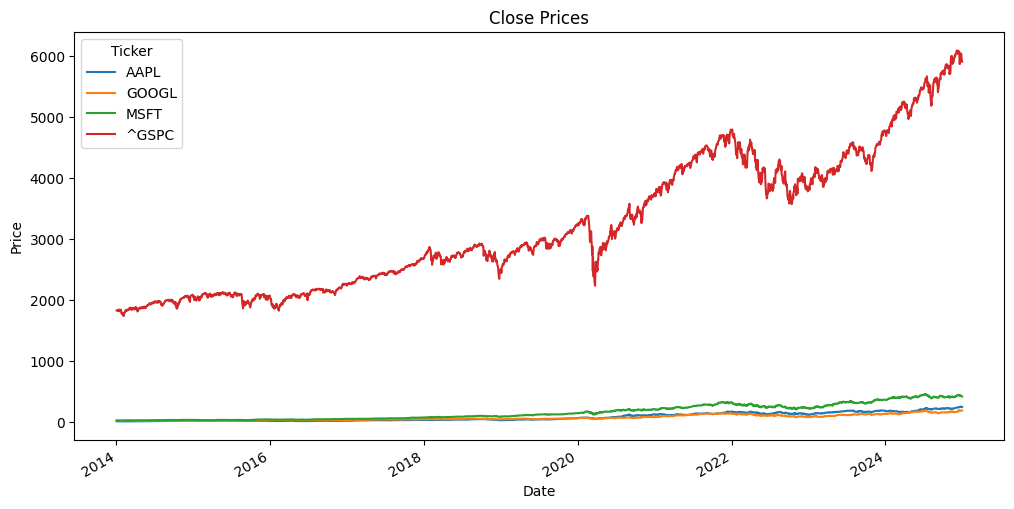


--- Plotting Close Prices with Moving Averages ---


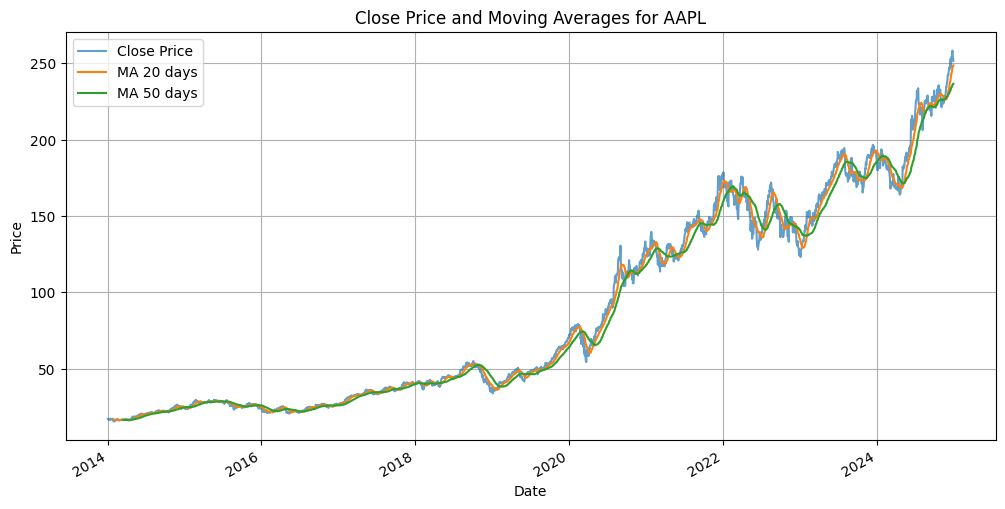

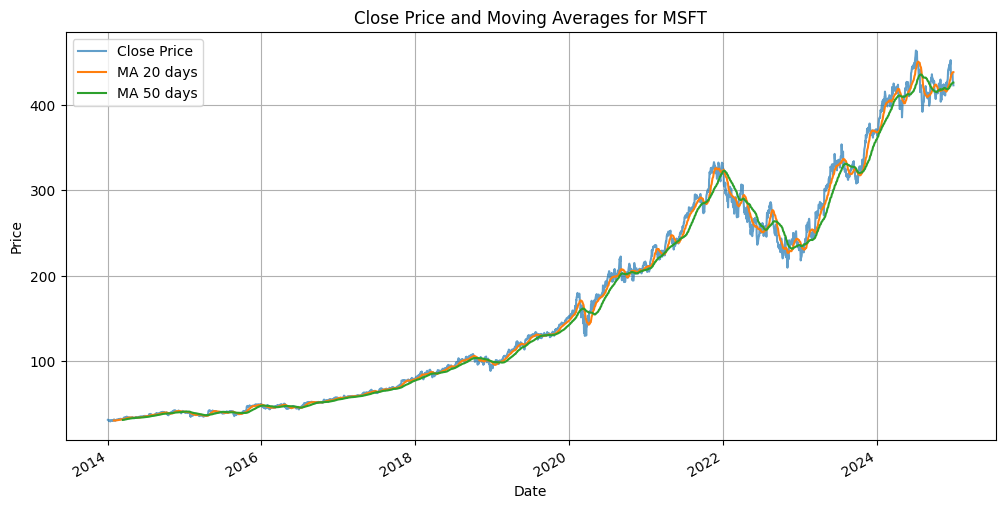

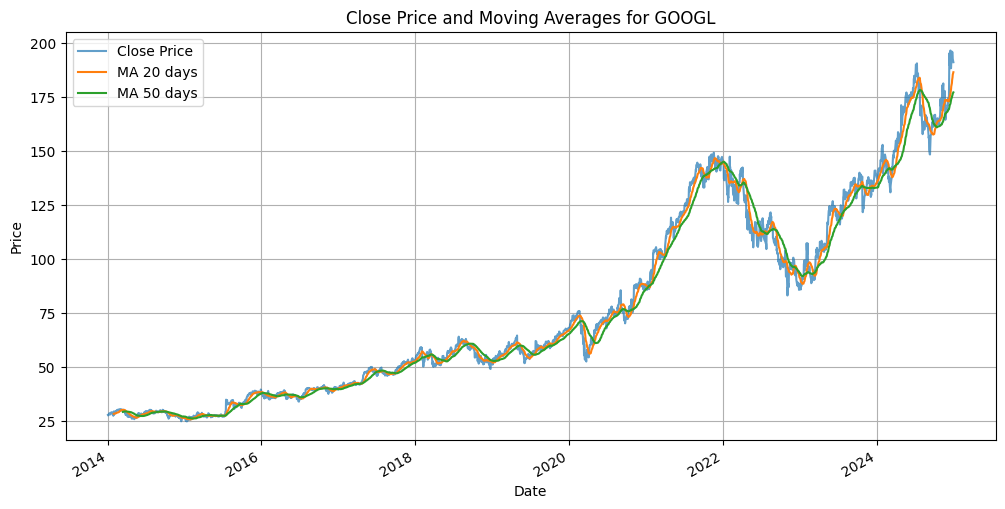

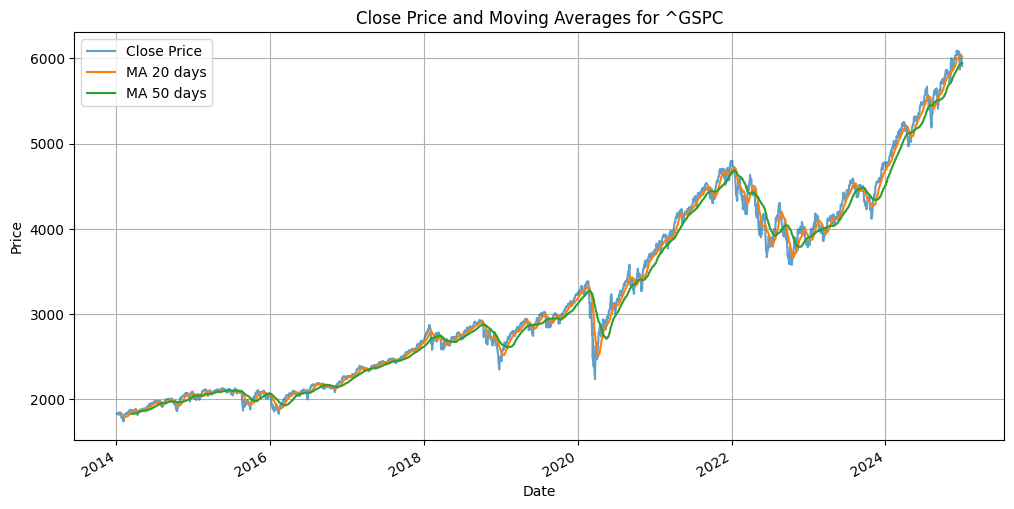

In [30]:
if not close_data.empty:
    print("\n--- Plotting Close Prices ---")
    close_data.plot(figsize=(12, 6), title="Close Prices", subplots=False) # subplots=True для отдельных графиков
    plt.ylabel("Price")
    plt.legend(title='Ticker')
    plt.show()

if not close_data.empty:
    print("\n--- Plotting Close Prices with Moving Averages ---")
    short_window = 20  # Например, 20-дневное МА (~ month)
    long_window = 50   # Например, 50-дневное МА (~ quartal)

    for ticker in tickers_list:
        if ticker in close_data.columns:
            plt.figure(figsize=(12, 6))
            close_data[ticker].plot(label='Close Price', alpha=0.7)
            close_data[ticker].rolling(window=short_window).mean().plot(label=f'MA {short_window} days')
            close_data[ticker].rolling(window=long_window).mean().plot(label=f'MA {long_window} days')
            plt.title(f"Close Price and Moving Averages for {ticker}")
            plt.xlabel("Date")
            plt.ylabel("Price")
            plt.legend()
            plt.grid(True)
            plt.show()

### 2.2. Statistical Properties of Returns


--- Plotting Daily Returns ---


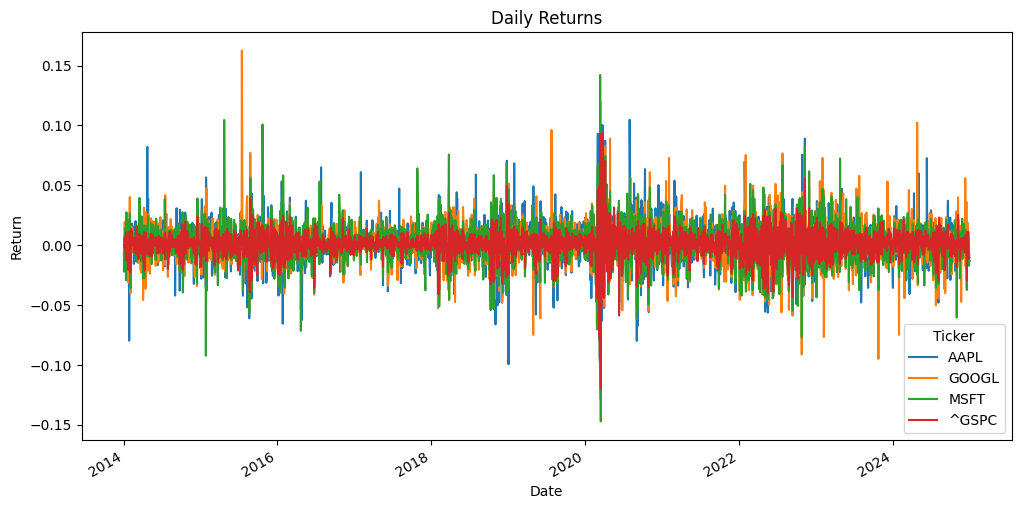


--- Plotting Histograms of Daily Returns ---


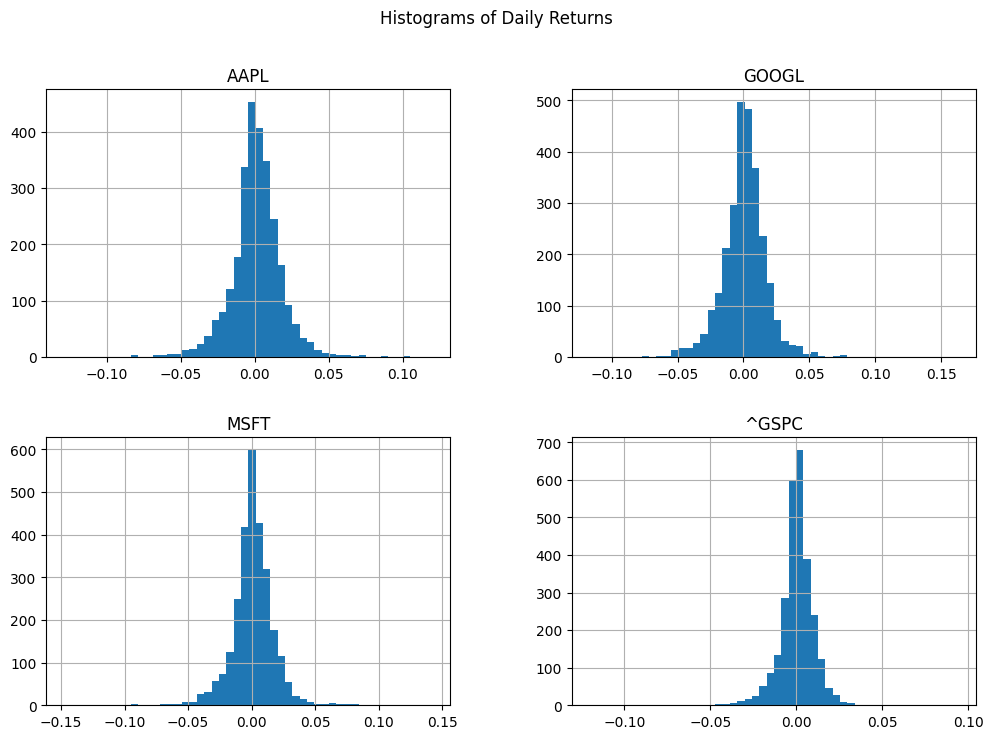

In [26]:
if 'daily_returns' in locals() and not daily_returns.empty: # Проверяем, существует ли daily_returns
    print("\n--- Plotting Daily Returns ---")
    daily_returns.plot(figsize=(12, 6), title="Daily Returns", subplots=False) # subplots=True для отдельных графиков
    plt.ylabel("Return")
    plt.show()

    print("\n--- Plotting Histograms of Daily Returns ---")
    daily_returns.hist(bins=50, figsize=(12, 8), sharex=False)
    plt.suptitle("Histograms of Daily Returns")
    plt.show()


--- Descriptive Statistics for Daily Returns ---
Ticker         AAPL        GOOGL         MSFT        ^GSPC
count   2766.000000  2766.000000  2766.000000  2766.000000
mean       0.001125     0.000852     0.001085     0.000483
std        0.017582     0.017573     0.016695     0.010922
min       -0.128647    -0.116341    -0.147390    -0.119841
25%       -0.007012    -0.007571    -0.006717    -0.003737
50%        0.001001     0.001142     0.000908     0.000653
75%        0.010116     0.009470     0.009664     0.005662
max        0.119808     0.162584     0.142169     0.093828

Skewness:
Ticker
AAPL    -0.011635
GOOGL    0.230104
MSFT     0.075650
^GSPC   -0.532558
dtype: float64

--- Seaborn Histograms and KDE for Daily Returns ---

Kurtosis:
Ticker
AAPL      5.567478
GOOGL     6.688485
MSFT      7.904332
^GSPC    14.952258
dtype: float64


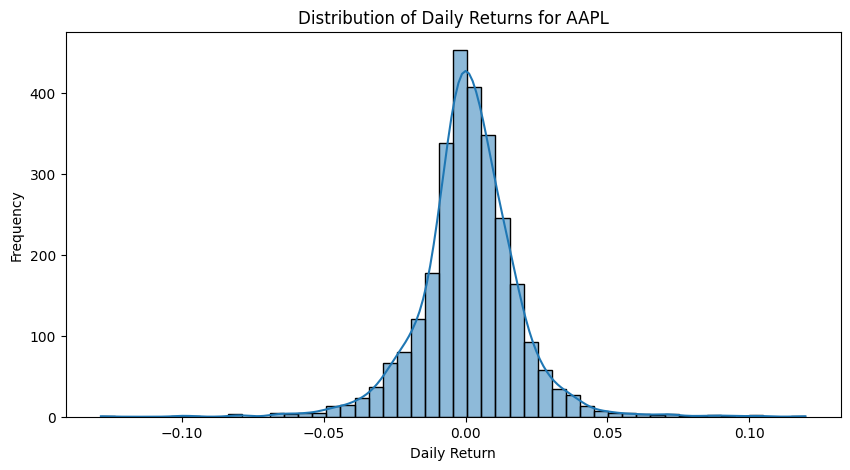

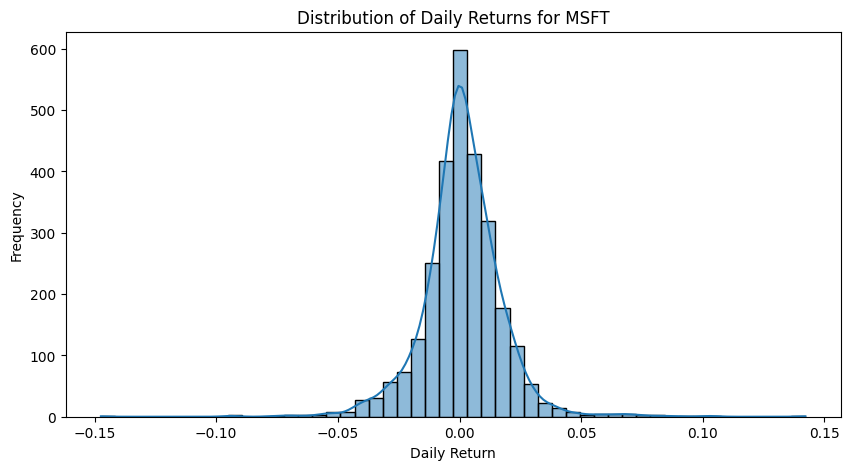

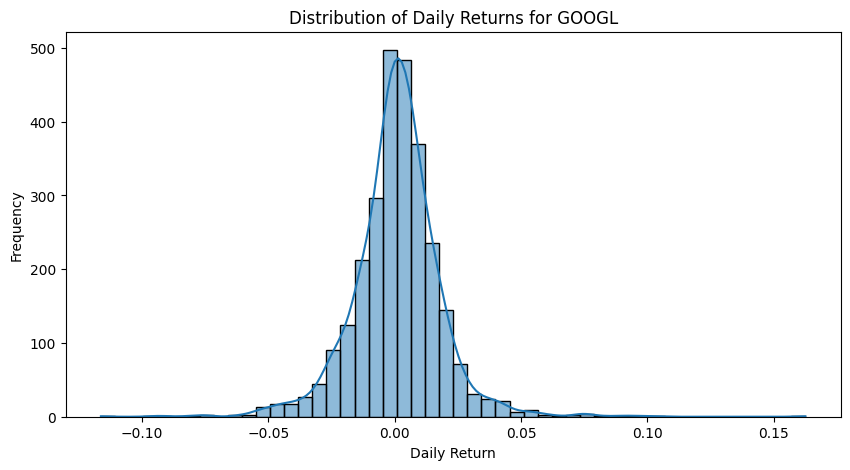

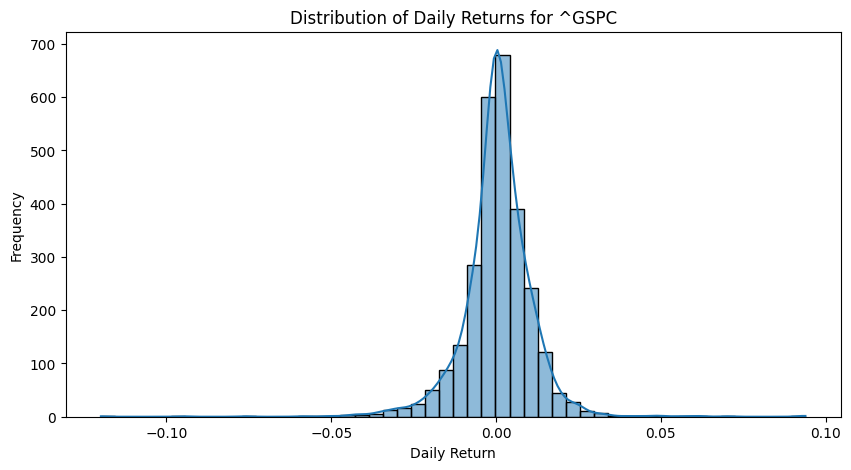

In [27]:
if 'daily_returns' in locals() and not daily_returns.empty:
    print("\n--- Descriptive Statistics for Daily Returns ---")
    desc_stats = daily_returns.describe()
    print(desc_stats)

    # Можно добавить асимметрию (skewness) и эксцесс (kurtosis)
    print("\nSkewness:")
    print(daily_returns.skew())
    print("\n--- Seaborn Histograms and KDE for Daily Returns ---")
    for ticker in tickers_list:
        if ticker in daily_returns.columns: # Убедимся, что тикер есть в данных
            plt.figure(figsize=(10, 5))
            sns.histplot(daily_returns[ticker], kde=True, bins=50)
            plt.title(f"Distribution of Daily Returns for {ticker}")
            plt.xlabel("Daily Return")
            plt.ylabel("Frequency")
            plt.show
    print("\nKurtosis:")
    print(daily_returns.kurt())


--- Seaborn Boxplots for Daily Returns Comparison ---


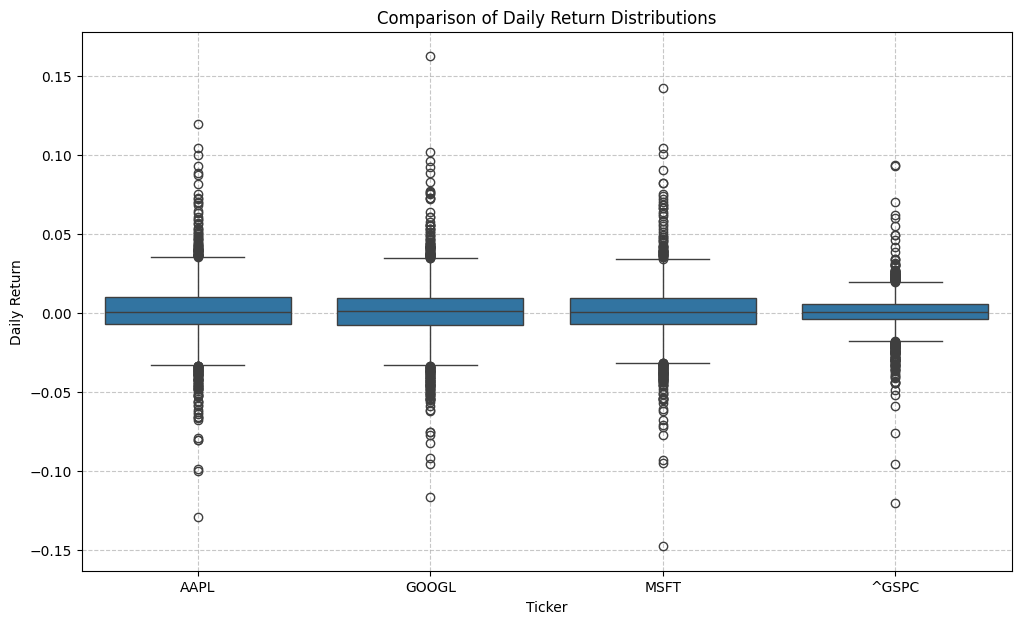

In [15]:
if 'daily_returns' in locals() and not daily_returns.empty:
    print("\n--- Seaborn Boxplots for Daily Returns Comparison ---")
    # "Расплавим" DataFrame для удобства Seaborn
    # Это преобразует DataFrame из "широкого" формата (тикеры в столбцах)
    # в "длинный" формат (один столбец для тикеров, один для значений)
    melted_returns = daily_returns.melt(var_name='Ticker', value_name='Return')

    plt.figure(figsize=(12, 7))
    sns.boxplot(x='Ticker', y='Return', data=melted_returns)
    plt.title("Comparison of Daily Return Distributions")
    plt.xlabel("Ticker")
    plt.ylabel("Daily Return")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

Large kurtosis values (> 5) demonstrate the daily returns distributions are non-Gaussian and have havier tails.


--- Plotting Rolling Volatility ---


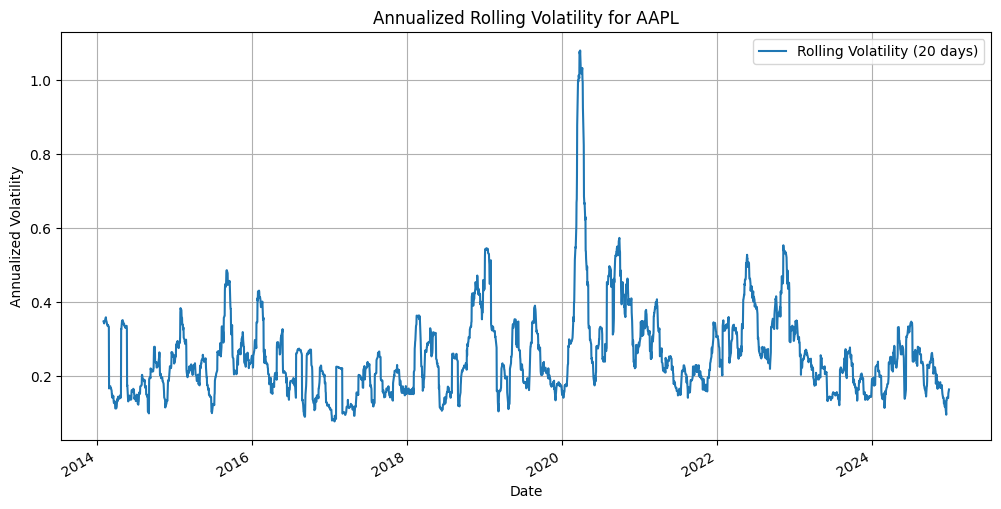

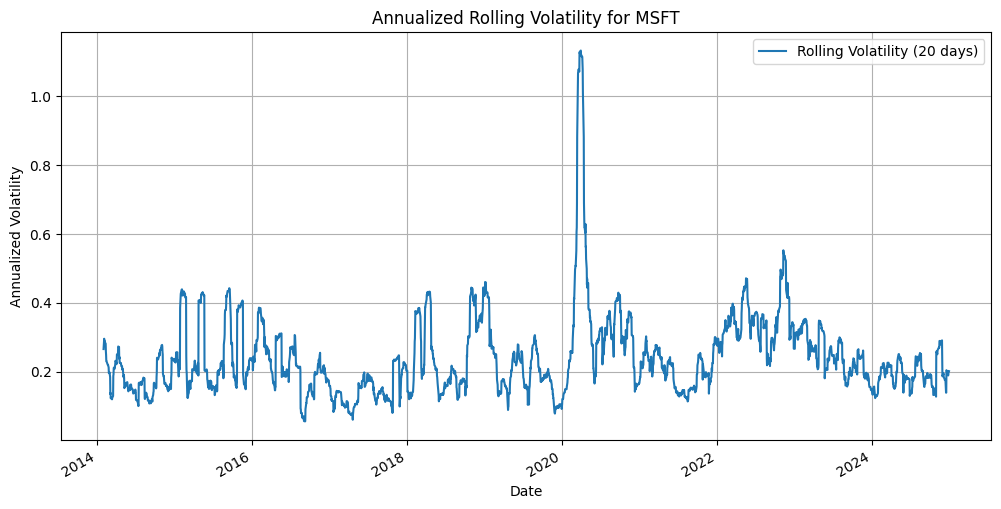

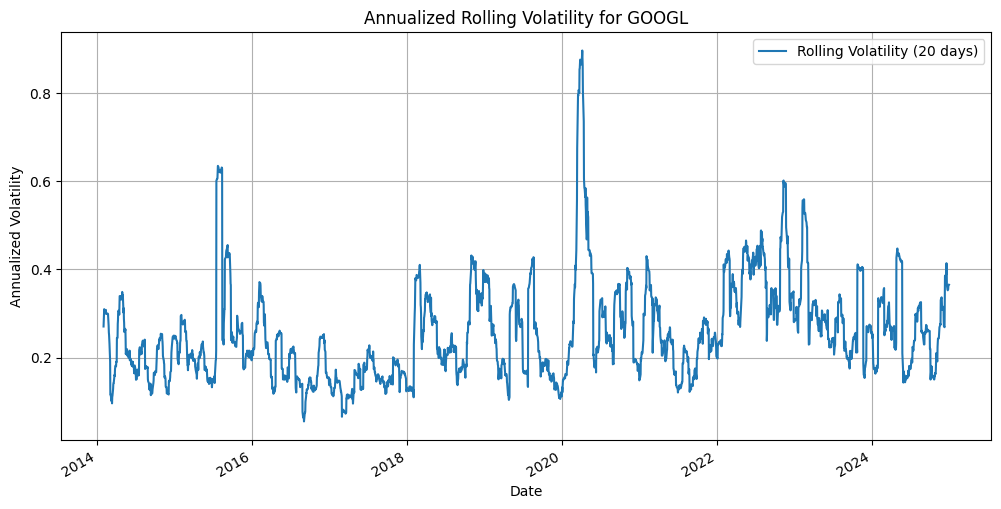

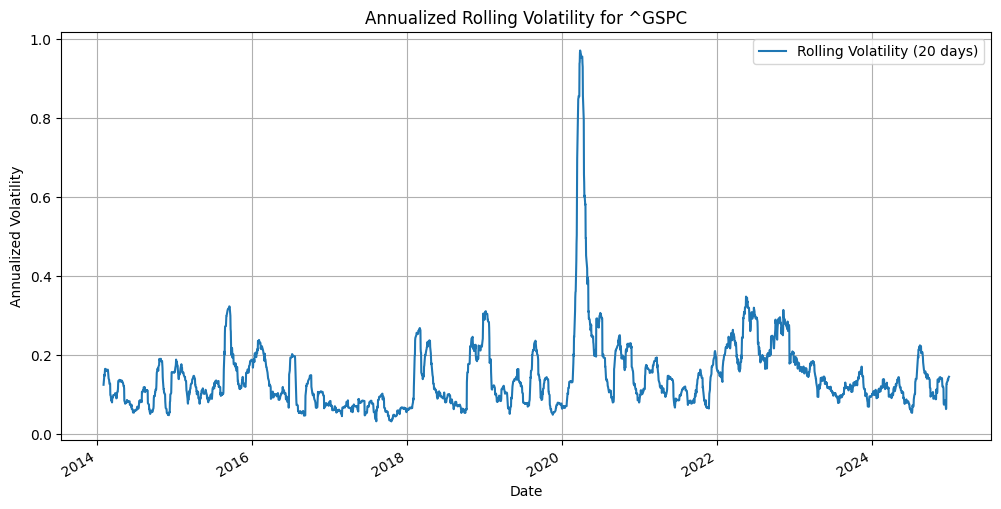

In [29]:
if 'daily_returns' in locals() and not daily_returns.empty:
    print("\n--- Plotting Rolling Volatility ---")
    vol_window = 20 # Например, 20-дневная волатильность

    for ticker in tickers_list:
        if ticker in daily_returns.columns:
            rolling_std = daily_returns[ticker].rolling(window=vol_window).std() * (252**0.5) # Аннуализированная волатильность
            # Мы умножаем на корень из 252 (примерное число торговых дней в году),
            # чтобы аннуализировать дневную волатильность (привести к годовому масштабу).
            # Это стандартная практика, но можно отображать и просто дневную.

            plt.figure(figsize=(12, 6))
            rolling_std.plot(label=f'Rolling Volatility ({vol_window} days)')
            plt.title(f"Annualized Rolling Volatility for {ticker}")
            plt.xlabel("Date")
            plt.ylabel("Annualized Volatility")
            plt.legend()
            plt.grid(True)
            plt.show()

# 3. Correlation analysis


--- Correlation Matrix of Daily Returns ---
Ticker      AAPL     GOOGL      MSFT     ^GSPC
Ticker                                        
AAPL    1.000000  0.583078  0.660009  0.732150
GOOGL   0.583078  1.000000  0.699928  0.716918
MSFT    0.660009  0.699928  1.000000  0.788413
^GSPC   0.732150  0.716918  0.788413  1.000000


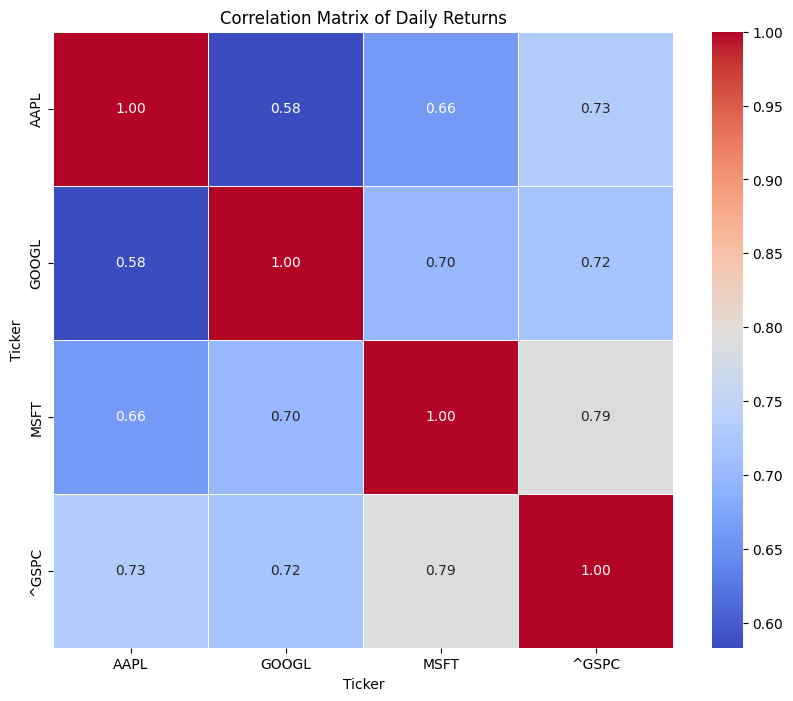

In [18]:
if 'daily_returns' in locals() and not daily_returns.empty:
    print("\n--- Correlation Matrix of Daily Returns ---")
    correlation_matrix = daily_returns.corr()
    print(correlation_matrix)

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    # annot=True: отобразить значения корреляции на ячейках.
    # cmap='coolwarm': цветовая схема (от синего для отрицательной корреляции до красного для положительной).
    # fmt=".2f": форматировать значения до двух знаков после запятой.
    # linewidths: добавить линии между ячейками для лучшей читаемости.
    plt.title("Correlation Matrix of Daily Returns")
    plt.show()


--- Scatter Plots of Returns (vs S&P 500) ---


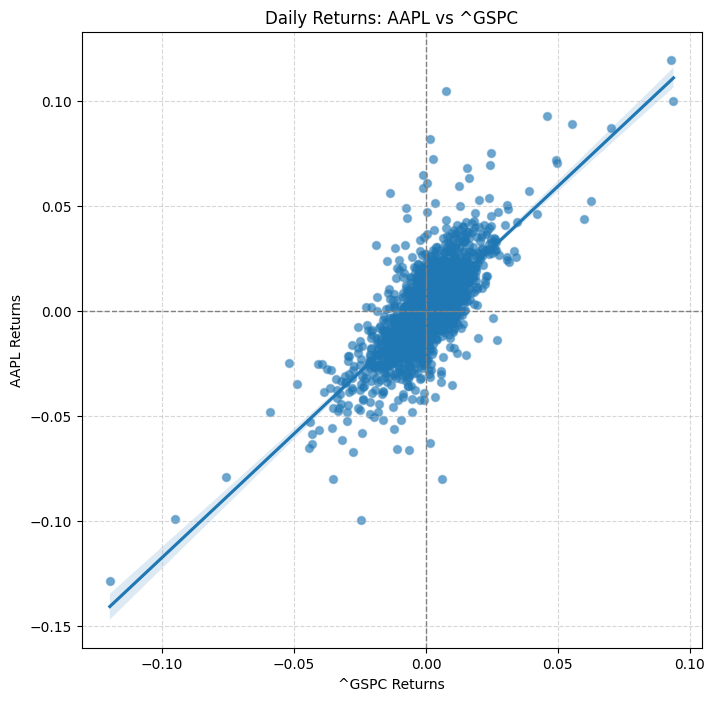

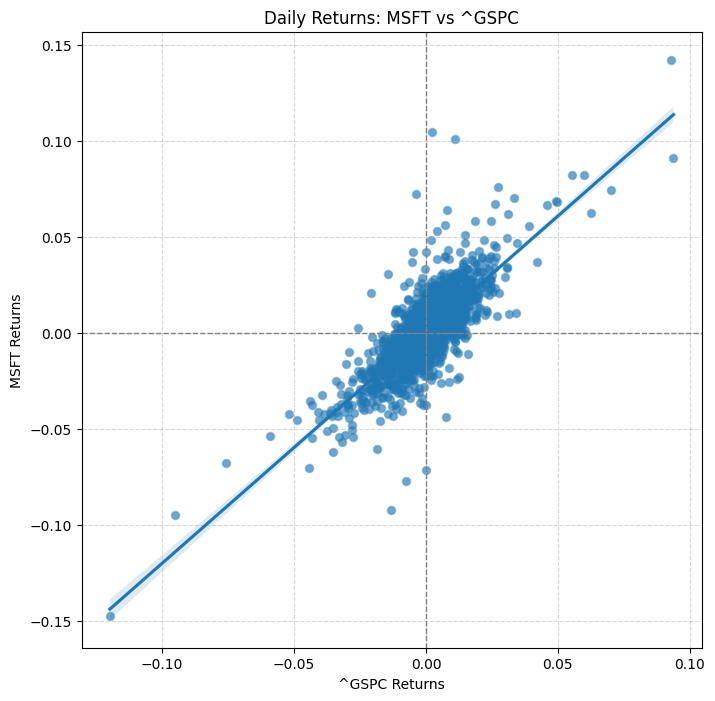

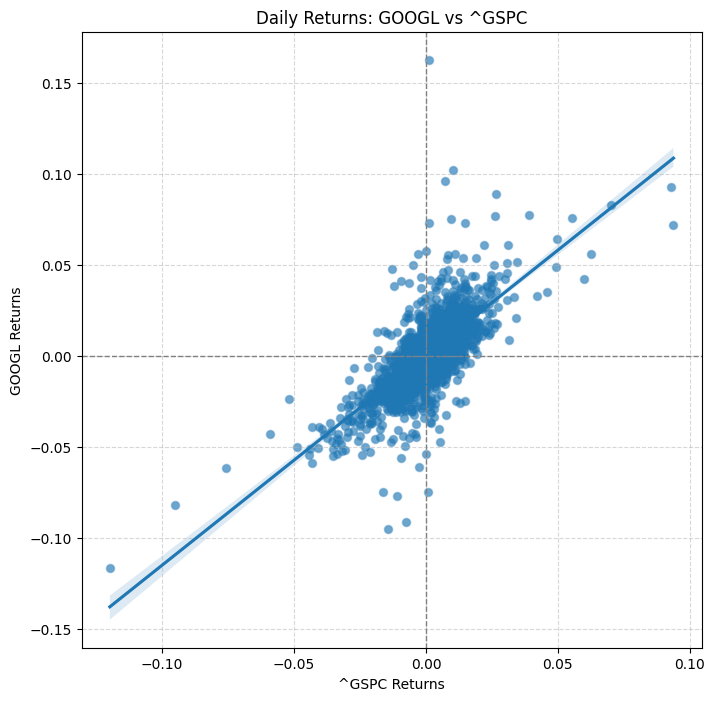

In [19]:
if 'daily_returns' in locals() and not daily_returns.empty and '^GSPC' in daily_returns.columns:
    print("\n--- Scatter Plots of Returns (vs S&P 500) ---")
    market_ticker = '^GSPC'
    for ticker in tickers_list:
        if ticker != market_ticker and ticker in daily_returns.columns:
            plt.figure(figsize=(8, 8))
            sns.scatterplot(x=daily_returns[market_ticker], y=daily_returns[ticker], alpha=0.5)
            # Можно добавить линию регрессии
            sns.regplot(x=daily_returns[market_ticker], y=daily_returns[ticker], scatter_kws={'alpha':0.3})
            plt.title(f"Daily Returns: {ticker} vs {market_ticker}")
            plt.xlabel(f"{market_ticker} Returns")
            plt.ylabel(f"{ticker} Returns")
            plt.axhline(0, color='grey', linestyle='--', lw=1)
            plt.axvline(0, color='grey', linestyle='--', lw=1)
            plt.grid(True, linestyle='--', alpha=0.5)
            plt.show()